 <h1 style="text-align: center;">UK Train Final Project</h1>

# **INTRODUCTION:**

#### In this project, we’re going to take a structured but practical approach to make the analysis process as effective as possible. Here’s how we’ll do it:  
1. **Ask:** First, we’ll define the key questions we need to answer—this will set the direction for our analysis.  
2. **Prepare:** Then, we’ll clean and organize the data. This means checking for duplicates, handling missing values, and making sure everything is ready for analysis.  
3. **Process:** To work with the data, we’ll use:  
   - `Jupyter Notebook` for exploration and coding  
   - **Tableau** for creating visual insights  
   - **PowerPoint** to present our findings in a clear and engaging way  
4. **Analyze:** Using Jupyter and Tableau, we’ll dig deep into the data, identify trends, and uncover meaningful insights.  
5. **Share:** Finally, we’ll bring it all together through visualizations that make the results easy to understand and act on.  

# 1. **Import Libraries**

All necessary libraries such as `pandas`, `numpy`, and `datetime` are imported to handle data manipulation and transformation.

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. **Import & Read the Data** 
The dataset is loaded using `pandas.read_csv()`. Initial exploration helps us understand the structure and content of the data.

In [6]:
df = pd.read_csv(r'Desktop/The Final Projects DEPI/UK Train Rides/railway.csv', index_col=0)
df.head(10)

,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
Transaction ID,,,,,,,,,,,,,,,,,
da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No
4e1dcd88-3d95-44ef-99fa,2023-12-30,07:56:06,Online,Credit Card,NaN,Standard,Advance,35,London Kings Cross,York,2024-01-01,06:15:00,08:05:00,08:05:00,On Time,NaN,No
1c74479d-85a4-4ba1-a607,2023-12-31,00:02:01,Station,Credit Card,Adult,Standard,Advance,2,London Euston,Oxford,2024-01-01,22:30:00,23:40:00,23:40:00,On Time,NaN,No
febf8dab-f808-46fa-bf2b,2023-12-31,01:35:18,Station,Contactless,Disabled,Standard,Advance,2,Liverpool Lime Street,Manchester Piccadilly,2024-01-01,00:00:00,00:30:00,00:30:00,On Time,NaN,No
01df916f-4291-41ec-a37d,2023-12-31,01:43:09,Station,Credit Card,NaN,Standard,Advance,37,London Euston,York,2024-01-01,00:00:00,01:50:00,02:07:00,Delayed,Signal Failure,No


# 3. **Data Cleaning**
This step ensures that the dataset is consistent, complete, and properly formatted for analysis.

### 3.1 View Dataset Info

Using `.info()` to review column data types and identify missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31653 entries, da8a6ba8-b3dc-4677-b176 to 1d5d89a2-bde5-410f-8f91
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date of Purchase     31653 non-null  object
 1   Time of Purchase     31653 non-null  object
 2   Purchase Type        31653 non-null  object
 3   Payment Method       31653 non-null  object
 4   Railcard             10735 non-null  object
 5   Ticket Class         31653 non-null  object
 6   Ticket Type          31653 non-null  object
 7   Price                31653 non-null  int64 
 8   Departure Station    31653 non-null  object
 9   Arrival Destination  31653 non-null  object
 10  Date of Journey      31653 non-null  object
 11  Departure Time       31653 non-null  object
 12  Arrival Time         31653 non-null  object
 13  Actual Arrival Time  29773 non-null  object
 14  Journey Status       31653 non-null  object
 15  Reason for Delay  

### 3.2 Fill Missing Values
Handle missing values (`NaN`) in key columns. For example:
- Replace missing `Railcard` entries with a placeholder like `'Not Used'`.
- Ensure all columns required for time calculations are filled appropriately.

In [11]:
df['Railcard']=df['Railcard'].fillna('Not Use')

In [12]:
df['Reason for Delay']=df['Reason for Delay'].fillna('Not delayed')

In [13]:
df['Reason for Delay'] = df['Reason for Delay'].str.replace("Signal failure", "Signal Failure", case=False)

In [14]:
df['Reason for Delay'] = df['Reason for Delay'].str.replace("Weather Conditions", "Weather", case=False)

In [15]:
df['Reason for Delay'] = df['Reason for Delay'].str.replace("Staff Shortage", "Staffing", case=False)

### 3.3 Handle Cancelled Journeys
Cancelled trips often have no `Actual Arrival Time`.  
To prevent calculation errors, we:
- Replace `NaN` in `Actual Arrival Time` with `Departure Time` **only for cancelled journeys**.
- This helps standardize time formats across the dataset.

In [17]:
df.loc[(df['Journey Status'] == 'Cancelled') & (df['Actual Arrival Time'].isna()),'Actual Arrival Time'] = df['Departure Time']

### 3.4 Re-check Data Structure

Call `.info()` again to ensure time columns are now clean and properly filled

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31653 entries, da8a6ba8-b3dc-4677-b176 to 1d5d89a2-bde5-410f-8f91
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date of Purchase     31653 non-null  object
 1   Time of Purchase     31653 non-null  object
 2   Purchase Type        31653 non-null  object
 3   Payment Method       31653 non-null  object
 4   Railcard             31653 non-null  object
 5   Ticket Class         31653 non-null  object
 6   Ticket Type          31653 non-null  object
 7   Price                31653 non-null  int64 
 8   Departure Station    31653 non-null  object
 9   Arrival Destination  31653 non-null  object
 10  Date of Journey      31653 non-null  object
 11  Departure Time       31653 non-null  object
 12  Arrival Time         31653 non-null  object
 13  Actual Arrival Time  31653 non-null  object
 14  Journey Status       31653 non-null  object
 15  Reason for Delay  

### 3.5 Convert Time Columns to Datetime

Convert all relevant columns (e.g., `Departure Time`, `Arrival Time`, `Actual Arrival Time`) from `object` to `datetime` format using `pd.to_datetime()`.

In [21]:
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])
df['Departure Time'] = pd.to_datetime(df['Date of Journey'].dt.date.astype(str) + ' ' + df['Departure Time'])
df['Arrival Time'] = pd.to_datetime(df['Date of Journey'].dt.date.astype(str) + ' ' + df['Arrival Time'])
df['Actual Arrival Time'] = pd.to_datetime(df['Date of Journey'].dt.date.astype(str) + ' ' + df['Actual Arrival Time'])

### 3.6 Adjust Actual Arrival Time

If the actual arrival time is **earlier than the scheduled arrival time**, it likely means the journey ended after midnight.  
We fix this by **adding one day** to the actual arrival time to align it correctly.


In [23]:
df.loc[df['Actual Arrival Time'] < df['Arrival Time'], 'Actual Arrival Time'] += pd.Timedelta(days=1)
df.loc[df['Arrival Time'] < df['Departure Time'], 'Arrival Time'] += pd.Timedelta(days=1)

In [24]:
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], errors='coerce')
df['Actual Arrival Time'] = pd.to_datetime(df['Actual Arrival Time'], errors='coerce')

# 4. **Feature Engineering**
Create new columns to support deeper insights and visualizations.

### 4.1 Journey Duration

Create a column to calculate the total journey time:

In [27]:
df['Journey Duration'] = df['Actual Arrival Time'] - df['Departure Time']
df['Journey Duration'] = df['Journey Duration'].apply(lambda x: str(x).split(' ')[2] if isinstance(x, pd.Timedelta) else '00:00:00')

### 4.2- Delay Duration

Create a column to calculate the total Delay Duration:
Then, format it into a readable MM:SS string, or return 'No Journey' for cancelled trips:

In [29]:
def calculate_delay(row):
    if row['Journey Status'] == 'Cancelled':
        return 'No Journey'
    else:
        delay = row['Actual Arrival Time'] - row['Arrival Time']
        total_seconds = delay.total_seconds()
        minutes = int((total_seconds % 3600) // 60)
        return f"{minutes:1}"
df['Duration of Delay'] = df.apply(calculate_delay, axis=1)

## 4.4 Adjusting Actual Arrival Time When It's Earlier Than Arrival Time

In some cases, the actual arrival time may appear earlier than the scheduled arrival time due to journeys that span midnight. To correct this, we add one day to the actual arrival time if it is earlier than the scheduled arrival time.

In [31]:
df['Actual Arrival Time'] = df.apply(lambda x: x['Actual Arrival Time'] + pd.Timedelta(days=1) if pd.notnull(x['Actual Arrival Time']) and x['Actual Arrival Time'] < x['Arrival Time'] else x['Actual Arrival Time'],axis=1)

## 4.5 Day of week

In [33]:
df['Journey Day'] = pd.to_datetime(df['Date of Journey']).dt.day_name()
df['Purchase Day'] = pd.to_datetime(df['Date of Purchase']).dt.day_name()

## 4.6 The period of the day

In [35]:
def get_time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time Period (Departure)'] = pd.to_datetime(df['Departure Time']).dt.hour.apply(get_time_period)
df['Time Period (Arrival)'] = pd.to_datetime(df['Arrival Time']).dt.hour.apply(get_time_period)
df['Time Period (Purchase)'] = pd.to_datetime(df['Time of Purchase']).dt.hour.apply(get_time_period)


C:\Users\محمدسامىالسيداحمدحسن\AppData\Local\Temp\ipykernel_420\3066175305.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time Period (Purchase)'] = pd.to_datetime(df['Time of Purchase']).dt.hour.apply(get_time_period)


## 4.7 Route

In [37]:
df['Route'] = df['Departure Station'] + ' : ' + df['Arrival Destination']

# 5. **Final Review**
-After all the cleaning steps, we display the updated dataset to confirm:
-All columns are clean and correctly typed.
-Time-based calculations are accurate.
New insight columns are ready for analysis.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31653 entries, da8a6ba8-b3dc-4677-b176 to 1d5d89a2-bde5-410f-8f91
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date of Purchase         31653 non-null  object        
 1   Time of Purchase         31653 non-null  object        
 2   Purchase Type            31653 non-null  object        
 3   Payment Method           31653 non-null  object        
 4   Railcard                 31653 non-null  object        
 5   Ticket Class             31653 non-null  object        
 6   Ticket Type              31653 non-null  object        
 7   Price                    31653 non-null  int64         
 8   Departure Station        31653 non-null  object        
 9   Arrival Destination      31653 non-null  object        
 10  Date of Journey          31653 non-null  datetime64[ns]
 11  Departure Time           31653 non-null  datetime64[ns]
 1

In [40]:
df.head(60)

,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,...,Reason for Delay,Refund Request,Journey Duration,Duration of Delay,Journey Day,Purchase Day,Time Period (Departure),Time Period (Arrival),Time Period (Purchase),Route
Transaction ID,,,,,,,,,,,,,,,,,,,,,
da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,...,Not delayed,No,02:30:00,0,Monday,Friday,Morning,Afternoon,Afternoon,London Paddington : Liverpool Lime Street
b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,...,Signal Failure,No,01:55:00,5,Monday,Saturday,Morning,Morning,Morning,London Kings Cross : York
f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,Not Use,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,...,Not delayed,No,00:30:00,0,Tuesday,Tuesday,Evening,Evening,Evening,Liverpool Lime Street : Manchester Piccadilly
b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,Not Use,Standard,Advance,13,London Paddington,Reading,...,Not delayed,No,01:00:00,0,Monday,Wednesday,Night,Night,Night,London Paddington : Reading
2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,Not Use,Standard,Advance,76,Liverpool Lime Street,London Euston,...,Not delayed,No,02:15:00,0,Monday,Wednesday,Afternoon,Evening,Evening,Liverpool Lime Street : London Euston
4e1dcd88-3d95-44ef-99fa,2023-12-30,07:56:06,Online,Credit Card,Not Use,Standard,Advance,35,London Kings Cross,York,...,Not delayed,No,01:50:00,0,Monday,Saturday,Morning,Morning,Morning,London Kings Cross : York
1c74479d-85a4-4ba1-a607,2023-12-31,00:02:01,Station,Credit Card,Adult,Standard,Advance,2,London Euston,Oxford,...,Not delayed,No,01:10:00,0,Monday,Sunday,Night,Night,Night,London Euston : Oxford
febf8dab-f808-46fa-bf2b,2023-12-31,01:35:18,Station,Contactless,Disabled,Standard,Advance,2,Liverpool Lime Street,Manchester Piccadilly,...,Not delayed,No,00:30:00,0,Monday,Sunday,Night,Night,Night,Liverpool Lime Street : Manchester Piccadilly
01df916f-4291-41ec-a37d,2023-12-31,01:43:09,Station,Credit Card,Not Use,Standard,Advance,37,London Euston,York,...,Signal Failure,No,02:07:00,17,Monday,Sunday,Night,Night,Night,London Euston : York


<h1 style="text-align: center;">So data Now is cleaned And now we can start the visualization Step</h1>

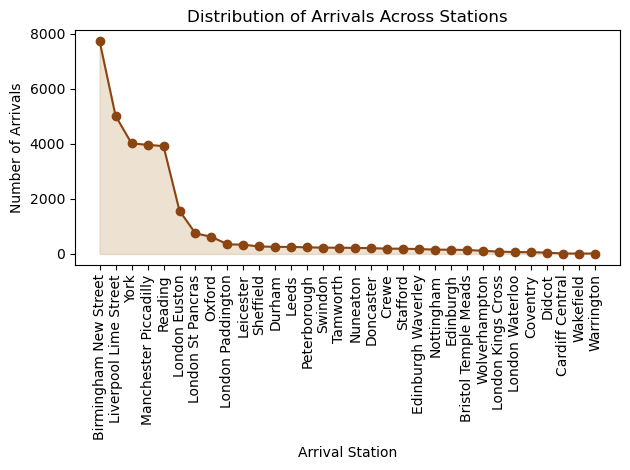

In [174]:
station_counts = df['Arrival Destination'].value_counts()
plt.plot(station_counts.index, station_counts.values, marker='o', linestyle='-', color='#8B4513')  
plt.fill_between(station_counts.index, station_counts.values, color='#D2B48C', alpha=0.4)
plt.xlabel("Arrival Station")
plt.ylabel("Number of Arrivals")
plt.title("Distribution of Arrivals Across Stations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

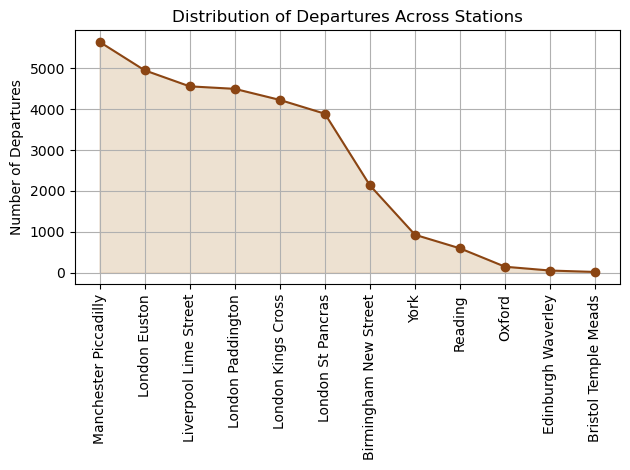

In [172]:
station_counts = df['Departure Station'].value_counts()
plt.plot(station_counts.index, station_counts.values, marker='o', linestyle='-', color='#8B4513')  
plt.fill_between(station_counts.index, station_counts.values, color='#D2B48C', alpha=0.4)
plt.ylabel("Number of Departures")
plt.title("Distribution of Departures Across Stations")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

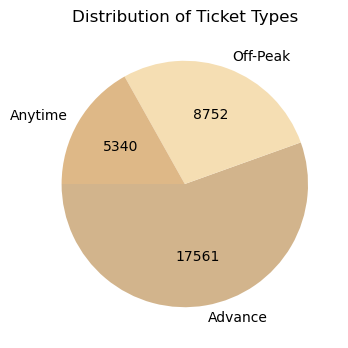

In [168]:
ticket_counts = df['Ticket Type'].value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
plt.figure(figsize=(4, 4))
plt.pie(ticket_counts,labels=ticket_counts.index,autopct=lambda p: f'{int(p * sum(ticket_counts) / 100)}',startangle=180,colors=light_brown_colors[:len(ticket_counts)])
plt.title("Distribution of Ticket Types")
plt.show()

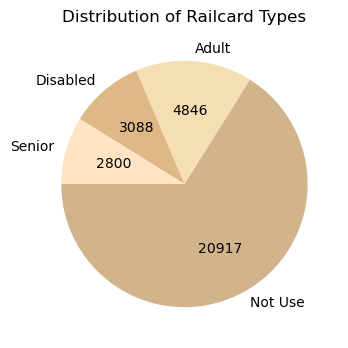

In [166]:
railcard_counts = df['Railcard'].dropna().value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
gray_colors = plt.cm.Greys(np.linspace(0.1, 0.5, len(railcard_counts)))
plt.figure(figsize=(4, 4))
plt.pie(railcard_counts,labels=railcard_counts.index,autopct=lambda p: f'{int(p * sum(railcard_counts) / 100)}',startangle=180,colors=light_brown_colors[:len(railcard_counts)])
plt.title("Distribution of Railcard Types")
plt.show()

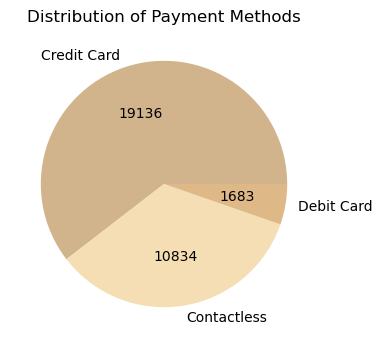

In [164]:
payment_counts = df['Payment Method'].value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
plt.figure(figsize=(4, 4))
plt.pie(payment_counts, labels=payment_counts.index, autopct=lambda p: f'{int(p * sum(payment_counts) / 100)}', colors=light_brown_colors[:len(payment_counts)])
plt.title("Distribution of Payment Methods")
plt.show()

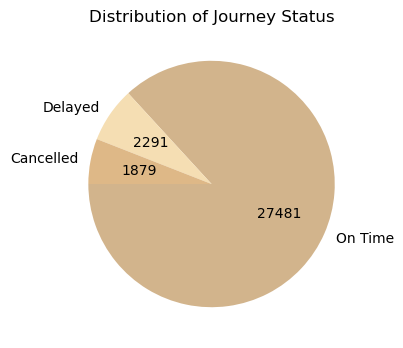

In [162]:
journey_status_counts = df['Journey Status'].value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
plt.figure(figsize=(4, 4))
plt.pie(journey_status_counts, labels=journey_status_counts.index, 
        autopct=lambda p: f'{int(p * sum(journey_status_counts) / 100)}', 
        startangle=180, colors=light_brown_colors[:len(journey_status_counts)])
plt.title("Distribution of Journey Status")
plt.show()

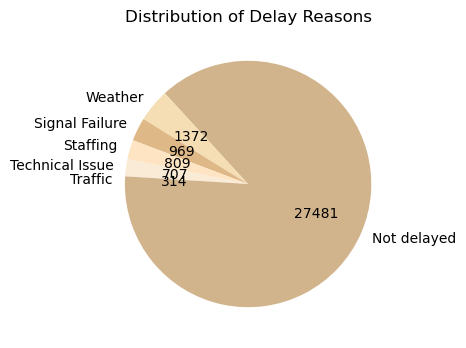

In [180]:
delay_reason_counts = df['Reason for Delay'].dropna().value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
plt.figure(figsize=(4, 4))
plt.pie(delay_reason_counts, labels=delay_reason_counts.index, 
        autopct=lambda p: f'{int(p * sum(delay_reason_counts) / 100)}', 
        startangle=180, colors=light_brown_colors[:len(delay_reason_counts)])
plt.title("Distribution of Delay Reasons")
plt.show()

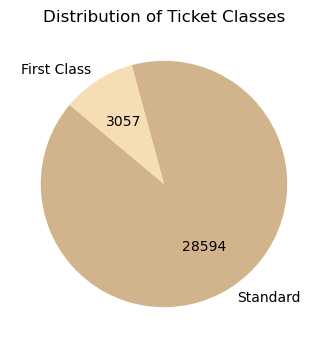

In [160]:
ticket_class_counts = df['Ticket Class'].value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
plt.figure(figsize=(4, 4))
plt.pie(ticket_class_counts, labels=ticket_class_counts.index, autopct=lambda p: f'{int(p * sum(ticket_class_counts) / 100)}',startangle=140, colors=light_brown_colors[:len(ticket_class_counts)])
plt.title("Distribution of Ticket Classes")
plt.show()

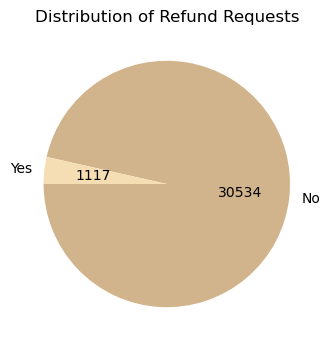

In [158]:
refund_counts = df['Refund Request'].value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
plt.figure(figsize=(4, 4))
plt.pie(refund_counts, labels=refund_counts.index, autopct=lambda p: f'{int(p * sum(refund_counts) / 100)}',startangle=180, colors=light_brown_colors[:len(refund_counts)])
plt.title("Distribution of Refund Requests")
plt.show()

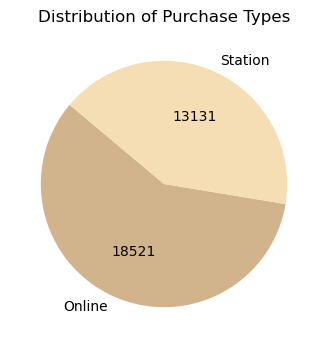

In [156]:
purchase_type_counts = df['Purchase Type'].value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
plt.figure(figsize=(4, 4))
plt.pie(purchase_type_counts, labels=purchase_type_counts.index, autopct=lambda p: f'{int(p * sum(purchase_type_counts) / 100)}',startangle=140, colors=light_brown_colors[:len(purchase_type_counts)])
plt.title("Distribution of Purchase Types")
plt.show()

C:\Users\محمدسامىالسيداحمدحسن\AppData\Local\Temp\ipykernel_420\4163036237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=purchase_day_counts.index, y=purchase_day_counts.values, palette=light_brown_colors)
C:\Users\محمدسامىالسيداحمدحسن\AppData\Local\Temp\ipykernel_420\4163036237.py:3: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=purchase_day_counts.index, y=purchase_day_counts.values, palette=light_brown_colors)


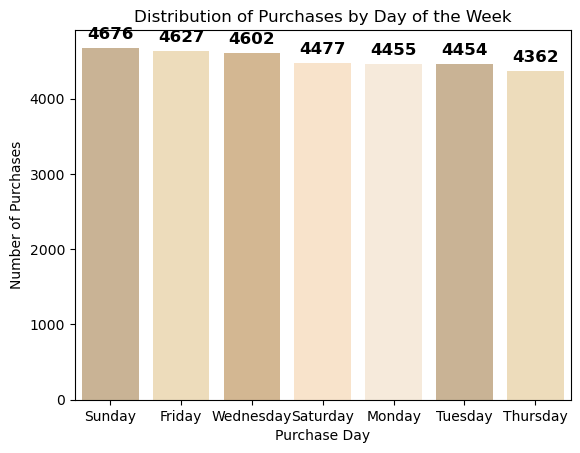

In [210]:
purchase_day_counts = df['Purchase Day'].value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
ax = sns.barplot(x=purchase_day_counts.index, y=purchase_day_counts.values, palette=light_brown_colors)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel("Purchase Day")
plt.ylabel("Number of Purchases")
plt.title("Distribution of Purchases by Day of the Week")
plt.xticks(rotation=0)
plt.show()

C:\Users\محمدسامىالسيداحمدحسن\AppData\Local\Temp\ipykernel_420\2687087311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=journey_day_counts.index, y=journey_day_counts.values, palette=light_brown_colors)
C:\Users\محمدسامىالسيداحمدحسن\AppData\Local\Temp\ipykernel_420\2687087311.py:3: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=journey_day_counts.index, y=journey_day_counts.values, palette=light_brown_colors)


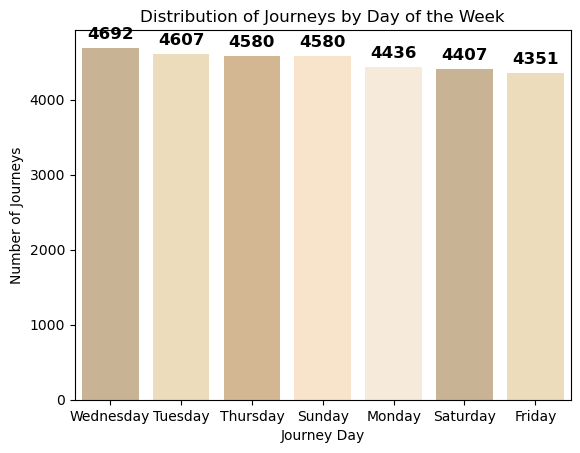

In [194]:
journey_day_counts = df['Journey Day'].value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
ax = sns.barplot(x=journey_day_counts.index, y=journey_day_counts.values, palette=light_brown_colors)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel("Journey Day")
plt.ylabel("Number of Journeys")
plt.title("Distribution of Journeys by Day of the Week")
plt.xticks(rotation=0)
plt.show()

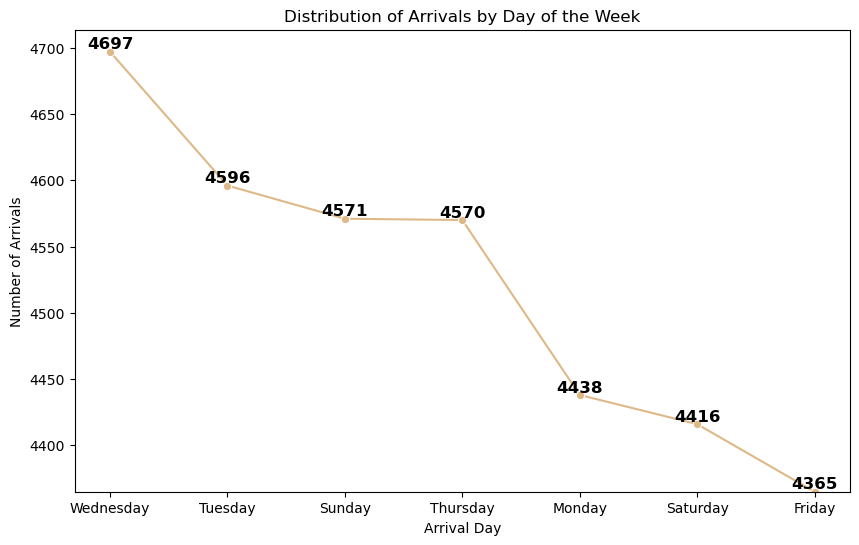

In [234]:
arrival_time_counts = df['Arrival Time'].dt.day_name().value_counts()
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
plt.figure(figsize=(10, 6))
sns.lineplot(x=arrival_time_counts.index, y=arrival_time_counts.values, marker='o', color=light_brown_colors[2])
for i in range(len(arrival_time_counts)):
    plt.text(i, arrival_time_counts.values[i], str(int(arrival_time_counts.values[i])), 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xlabel("Arrival Day")
plt.ylabel("Number of Arrivals")
plt.title("Distribution of Arrivals by Day of the Week")
plt.xticks(rotation=0)
plt.ylim(bottom=arrival_time_counts.min()) 
plt.show()


C:\Users\محمدسامىالسيداحمدحسن\AppData\Local\Temp\ipykernel_420\3280176791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=route_counts.index, y=route_counts.values, palette=light_brown_colors)
C:\Users\محمدسامىالسيداحمدحسن\AppData\Local\Temp\ipykernel_420\3280176791.py:3: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=route_counts.index, y=route_counts.values, palette=light_brown_colors)


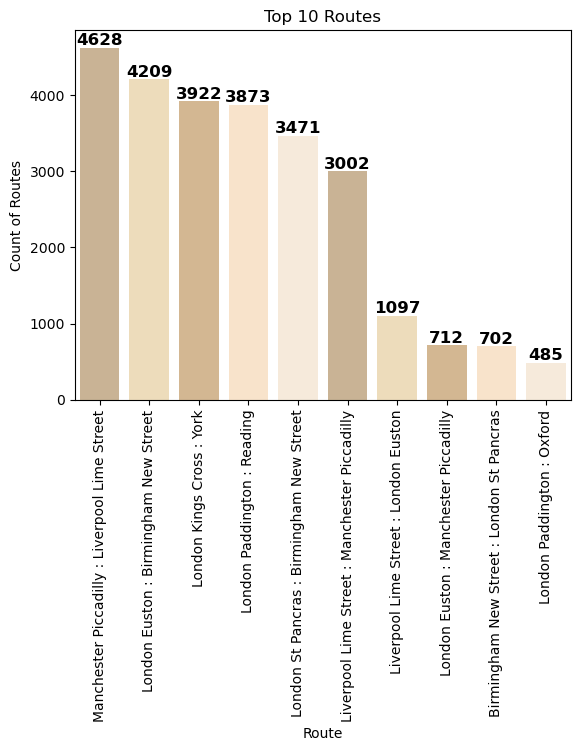

In [232]:
route_counts = df['Route'].value_counts().head(10)
light_brown_colors = ['#D2B48C', '#F5DEB3', '#DEB887', '#FFE4C4', '#FAEBD7']
sns.barplot(x=route_counts.index, y=route_counts.values, palette=light_brown_colors)
for i in range(len(route_counts)):
    plt.text(i, route_counts.values[i], str(int(route_counts.values[i])), 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xlabel("Route")
plt.ylabel("Count of Routes")
plt.title("Top 10 Routes")
plt.xticks(rotation=90)
plt.show()


# 7. **Extract the data**

In [77]:
df.to_csv('C:/Users/محمدسامىالسيداحمدحسن/Desktop/Final Project Data For Tableau.csv', index=False)

# 8. **Colecct uniqe trips on the data on another file**

In [ ]:
df = pd.read_csv(r'C:/Users/محمدسامىالسيداحمدحسن/Desktop/Final Project Data For Tableau.csv')
unique_journeys = df.drop_duplicates(subset=['Departure Station', 'Arrival Destination','Departure Time', 'Arrival Time', 'Date of Journey'])
unique_journeys.to_csv(r'Desktop/ Trips.csv', index=False)